## Pytorch workflow

Pytorch end to end workflow

1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making predictions and evaluating the model (inference)
5. saving and loading a model
6. putting it all together

In [21]:
import torch
from torch import nn #nn contains all of pytorch's budilding block for neural networks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1. Data preparing and loading
data can be alsmost anything in machine learning

1. excel sheet
2. images of anykind
3. Videos(youtube)
4. Audio like songs or podcast
5. DNA
6. Text etc...

Machine learning is a game of two parts:
1. Get data into a numerical represntation
2. Build model to learn patterns in that numerical represnetation

Let's create some know data using linear regression formula

Make a straight line with known parameters


In [113]:
# creating known parameters
weights = 0.7
bias = 0.3

#create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) #unsqueeze adds extra dimension
y = weights * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning)
1. Trainig set (course materials)
2. Validation set (practice exam) 
3. Test set (Final exam)

the goal is Generalization (ability of model to perform well on the unseen data)

In [114]:
## Splitting data into training and test sets (one of the most important concepts in machine learning)
train_split = int(0.8 * len(X))
X_train, y_train =  X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

How might we better visualize our data?
visualize

In [115]:
def plot_predicitons(train_data = X_train,
                     train_lables = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = None) :

 plt.figure (figsize=(10,7))

 #plot training data in blue
 plt.scatter(train_data,train_lables, c='b', s=4, label = "Training data")

 #plot test data
 plt.scatter(test_data, test_lables, c='r', s=4, label= "Test data")

 if predictions is not None:
     plt.scatter(test_data, predictions, c='y', s=4, label="Predictions")

 #Show the legend
 plt.legend(prop={"size": 14});
 

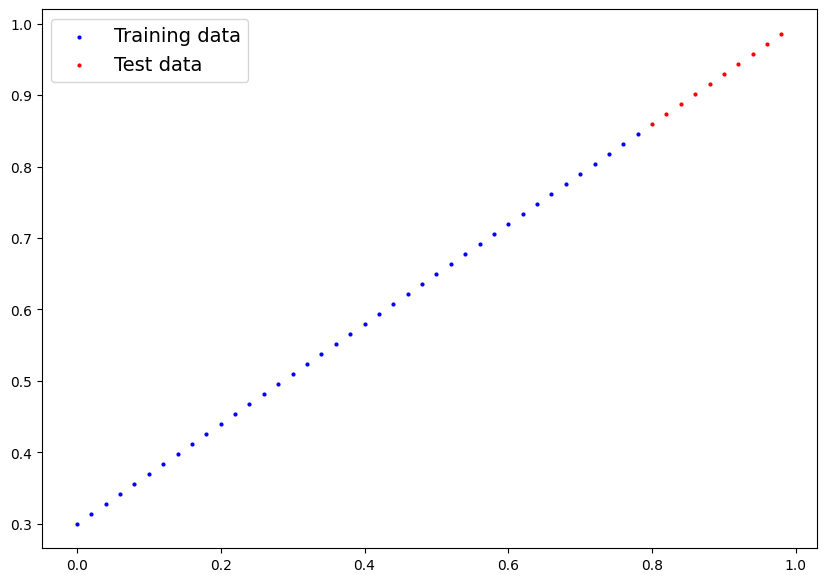

In [116]:
plot_predicitons();

## Building a model

1. Model working:

* Start with random weights and bias and look at training data and adjust the random values to better represent ot closer to the ideal values (the actual data we feed)

Through 2 algorithms

* Gradient descent
* Backpropogation

In [117]:
#Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad = True, 
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=float))
    
    #Forward method to define the computation in the model
    
    def forward(self, x: torch.Tensor): # x is the input data
        return self.weights * x + self.bias #Linear regression formula


## Pytorch model buidling essentials

* torch.nn contains all of the buildings of computational graph 
* torch.nn.Parameter - What parameters should our model try and learn , often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it you should overwrite forward
* torch.optim - this is where the optimizers in pytorch is located, they will help with gradient descentant
* def forward() all nn.module subclasses requires to overwrite forward, this method represnts what happens in the forward computation

## Checking the contents of our pytorch model

we can check our model parameters or what's inside our model using `.parameters()`

In [118]:
# creating random seed
torch.manual_seed(42)

#create an instance of the model (this is subclass of nn.model)
model_0 = LinearRegressionModel()

# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [119]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

## Making predctions using `torch.inference_mode()`

* To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model, it's going to run it through forward() method

In [120]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [121]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

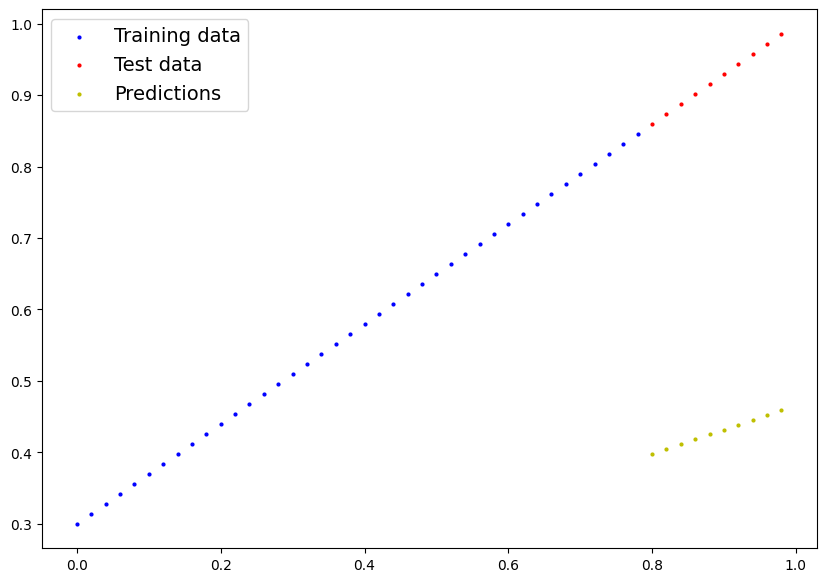

In [122]:
plot_predicitons(predictions=y_preds)

## 3. Train model

The whole idea of training for the model to move from unknown parameters to some known parameters

a poor represntation of data to better representation of data

One way to measure how poor or how wrong your models predtions are use Loss functions

*Note : Loss function may also be called cost function or criterions on different areas

* **Loss function**: function to measure how wrong model predictions are to the ideal function, lower is better
* **Optimizer**: Takes into accouunt the loss of a model and adjust the model's parameters (eg. weights and bias in this case) to improve loss function.

And specifically for Pytorch, we need:
* A Training loop
* A testing loop

In [123]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup a optimizer funtion
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #learning rate = posssibly the most important hyperparameter you can set, the larger larger in change in parameter and vice versa

which loss function should i use?

* it is problem specific.

* For example, for a regression problem(like ours), a loss function of `nn.L1loss()` and a optim like `torch.optim.SGD()` will suffice.

* But for classification problem, like classifying whether a photo is a dog or a cat, `nn.BCELoss()` (binary cross entrophy loss) can be used

## Building a training loop in pytorch
 Thing we need in training loop:
 1. Loop through the data
 2. forward pass (This involves data moving through our model's foward() also called propogation) to make predictions on data
 3. Calculate the loss(compare forward pass predictions to ground truth lables)
 4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propogation**)
 5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve loss. (**Gradient Descent**)


In [124]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [125]:
torch.manual_seed(42)

#An epoch is one loop through all the data (Hyperparameter we've set it ourselves)
epochs = 200

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 1. Loop through the data
for epoch in range (epochs):
    
    #Set the model to training mode
    model_0.train() #train mode in Pytorch sets all parameters that require gradients to the gradients
    
    #1. Forward pass
    y_preds = model_0(X_train)

    #2. Calulate the loss
    loss = loss_fn(y_preds, y_train)

    #3.  Optimizer Zero grad
    optimizer.zero_grad()

    #4. perform back propagation on the loss with respect to parameters model
    loss.backward()

    #5. Step the optimizer (Perform gradient descent)
    optimizer.step() #by default how the optimizer changes will accumulate through the loop.. we have to zero them in step 3 so that we will carry on with training

    #Testing
    model_0.eval() #turns off gradient tracking, turns off different setting in the model not needed for evaluation/test (droptout/batchnorm layers etc..)
    with torch.inference_mode(): #turns off gradient tracking and couple more things
        #1. Do the forward pass in testing mode
        test_pred = model_0(X_test)

        #2. calulate the loss
        test_loss = loss_fn(test_pred, y_test)

    
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epochs: {epoch} | Loss: {loss} | Test loss: {test_loss}") 
        
     #Print out model State_dict()
      print(model_0.state_dict())


Epochs: 0 | Loss: 0.3128813517678373 | Test loss: 0.4810651795382455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388], dtype=torch.float64))])
Epochs: 10 | Loss: 0.19767138632506426 | Test loss: 0.346355255078788
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388], dtype=torch.float64))])
Epochs: 20 | Loss: 0.08908726094682914 | Test loss: 0.21729659528684148
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333], dtype=torch.float64))])
Epochs: 30 | Loss: 0.05314853437903411 | Test loss: 0.14464020247411263
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768], dtype=torch.float64))])
Epochs: 40 | Loss: 0.045437965798191725 | Test loss: 0.11360953504991064
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868], dtype=torch.float64))])
Epochs: 50 | Loss: 0.04167863324115598 | Test loss: 0.09919951553296583
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843], dtype=torch.float64))])
Epochs: 

In [130]:
np.array(torch.tensor(loss_values).cpu().numpy())
np.array(torch.tensor(test_loss_values).cpu().numpy())

array([0.48106518, 0.34635526, 0.2172966 , 0.1446402 , 0.11360954,
       0.09919952, 0.08886642, 0.08059397, 0.07232152, 0.06473596,
       0.05646351, 0.04819105, 0.04060549, 0.03233303, 0.02406059,
       0.01647502, 0.00820257, 0.00502417, 0.00502417, 0.00502417])

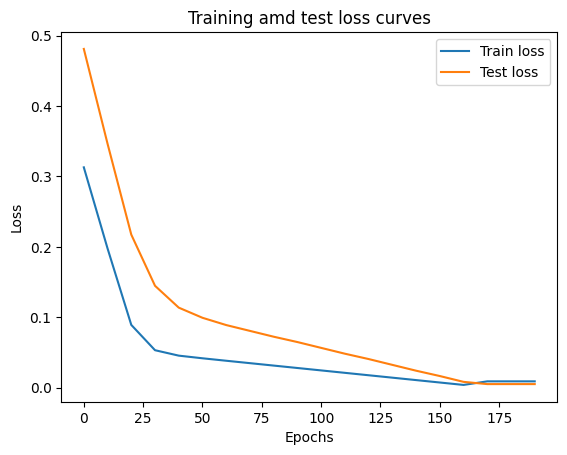

In [131]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("Training amd test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [126]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [112]:
weights,bias

(0.7, 0.3)

In [127]:
with torch.inference_mode():
    y_preds_new =  model_0(X_test)

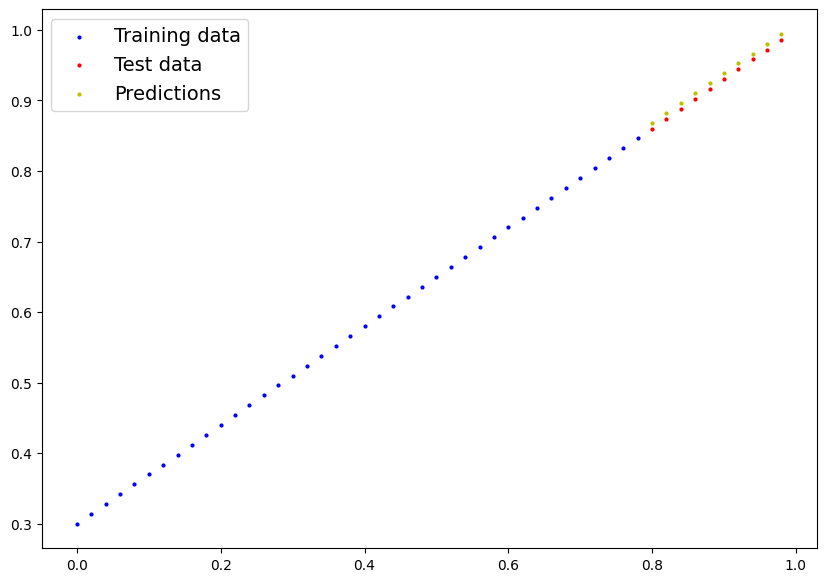

In [128]:
plot_predicitons(predictions=y_preds_new);